In [1]:
import pyNUISANCE as pn
import pyNuHepMC as nhm

evs = pn.EventSource("dune_argon_sf_10mega.nuwro.pb.gz")
if not evs:
    print("Error: failed to open input file")

def enu_GeV(ev):
    bpart = pn.pps.sel.Beam(ev,14)
    if bpart:
        return bpart.momentum().e() * 1E-3
    return -0

def isCC(ev):
    beamp = nhm.EventUtils.GetBeamParticle(ev)
    beam_pid = beamp.pid()
    cc_lep_pid = (beam_pid - 1) if (beam_pid > 0) else (beam_pid + 1);
    return bool(nhm.EventUtils.GetParticle_FirstRealFinalState(ev, [int(cc_lep_pid)]))
    

def lep_ptheta_GeVRad(ev):
    beamp = nhm.EventUtils.GetBeamParticle(ev)
    beam_pid = beamp.pid()
    cc_lep_pid = (beam_pid - 1) if (beam_pid > 0) else (beam_pid + 1);
    lep = nhm.EventUtils.GetParticle_FirstRealFinalState(ev, [int(cc_lep_pid)])
    if lep:
        return [lep.momentum().e() * 1E-3,lep.momentum().theta()]
    return [-0,-0]

def cpi_p_GeV(ev):
    cpis = nhm.EventUtils.GetParticles_AllRealFinalState(ev, [211,-211])
    if len(cpis):
        cpi_p = [p.momentum().length() * 1E-3 for p in cpis]
        cpi_p.sort(reverse=True)
        cpi_p.extend([-0,-0])
        return cpi_p
    return [-0,-0]


[2024-03-06 15:28:27.016] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-GHEP3.so
[2024-03-06 15:28:27.038] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-NuWroevent1.so
[2024-03-06 15:28:27.043] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-neutvect.so
[2024-03-06 15:28:27.045] [info] EventSourceFactory: PathResolver::resolve filepath: dune_argon_sf_10mega.nuwro.pb.gz, exists: true
[2024-03-06 15:28:27.248] [info] Reading file dune_argon_sf_10mega.nuwro.pb.gz with native HepMC3EventSource


In [ ]:
wt2k_disp = pn.Prob3plusplusWeightCalc()
wt2k_disp.set_parameters({"baseline:DUNE": 1, "t2k:bestfit": 1, "osc:numu_disp":1})

df = pn.FrameGen(evs).limit(int(1E6)) \
    .filter(isCC) \
    .add_column("enu_GeV",enu_GeV) \
    .add_column("disp_w",wt2k_disp.calc_weight) \
    .add_columns(["plep_GeV","thetalep_Rad"],lep_ptheta_GeVRad) \
    .add_columns(["hmcpi","smcpi"],cpi_p_GeV) \
    .all()

[2024-03-06 15:28:33.357] [info] [Prob3plusplusWeightCalc]: Set numu disappearance oscillation channel: 2 -> 2
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set baseline_km = 1300
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set DUNE baseline
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set sinsq_th12 = 0.297
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set sinsq_th13 = 0.0214
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set sinsq_th23 = 0.526
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set dmsq_21 = 7.37e-05
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set dmsq_atm = 0.002463
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set dcp_rad = 0
[2024-03-06 15:28:33.358] [info] [Prob3plusplusWeightCalc]: Set T2K bestfit parameters


In [41]:
print(df.table.shape)

(50000, 8)


In [19]:
enu_hf = pn.HistFrame(pn.Binning.log10_space(30,0.5,6))
enu_hf.add_column("osc")
for r in df.table:
    enu_hf.fill(r[2],r[1])
    enu_hf.fill(r[2],r[1]*r[3],1)
print(enu_hf)

 ---------------------------------------
 | bin |   mc |   err |   osc |    err |
 ---------------------------------------
 |   0 |   53 |  7.28 | 1.766 | 0.3533 |
 |   1 |   80 | 8.944 | 26.81 |  3.329 |
 |   2 |   98 | 9.899 | 81.84 |   8.34 |
 |   3 |  133 | 11.53 | 127.6 |  11.07 |
 |   4 |  168 | 12.96 | 107.6 |  8.478 |
 |   5 |  205 | 14.32 | 47.98 |  3.669 |
 |   6 |  268 | 16.37 |  4.91 | 0.4723 |
 |   7 |  370 | 19.24 | 35.36 |  2.144 |
 |   8 |  460 | 21.45 |   174 |  8.338 |
 |   9 |  549 | 23.43 | 373.9 |  16.08 |
 |  10 |  702 |  26.5 | 635.9 |  24.03 |
 |  11 |  846 | 29.09 | 839.7 |  28.87 |
 |  12 |  910 | 30.17 | 859.5 |  28.51 |
 |  13 | 1217 | 34.89 | 975.1 |  28.01 |
 |  14 | 1396 | 37.36 | 852.7 |  22.92 |
 |  15 | 1786 | 42.26 | 747.7 |  17.84 |
 |  16 | 2181 |  46.7 |   544 |  11.82 |
 |  17 | 2459 | 49.59 | 303.8 |  6.303 |
 |  18 | 2834 | 53.24 | 118.7 |    2.4 |
 |  19 | 3286 | 57.32 |  17.9 | 0.4271 |
 |  20 | 3818 | 61.79 | 23.22 | 0.4816 |
 |  ... |   ... 

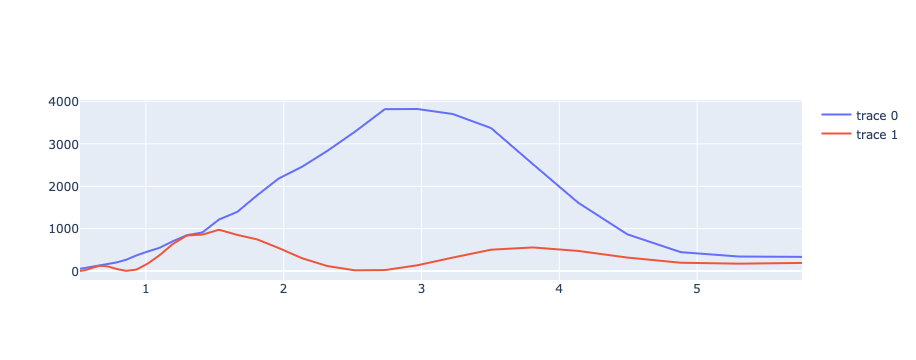

In [20]:
import plotly.io as pi
j = pn.plotly1D(enu_hf)
fig = pi.from_json(j)
fig.show()

In [22]:
import math

ptheta_hf = pn.HistFrame(pn.Binning.lin_spaceND([[20,0,5],[20,0,math.pi]],["plep [GeV]","theta [rad]"]))
for r in df.table:
    ptheta_hf.fill([r[4],r[5]],r[1])
# print(ptheta_hf)

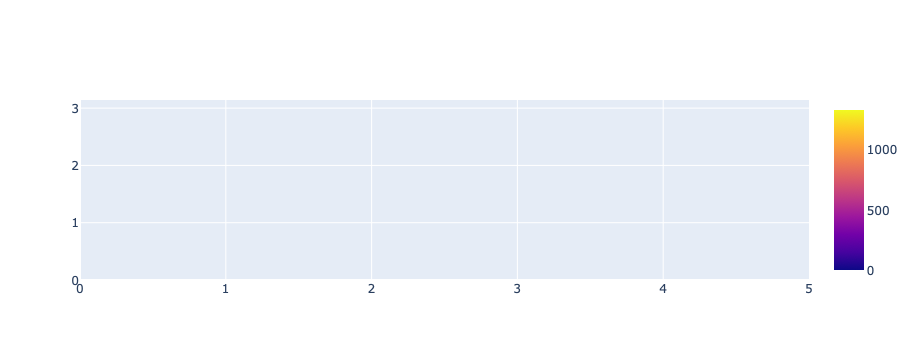

In [23]:
j = pn.plotly2D(ptheta_hf)
fig2 = pi.from_json(j)
fig2.show()

In [38]:
pipi_hf = pn.HistFrame(pn.Binning.lin_spaceND([[30,0,0.5],[30,0,0.5]]))
print(df.table.shape)
for r in df.table:
    if r[7] > 0:
        pipi_hf.fill([r[6],r[7]],r[1])

(50000, 8)


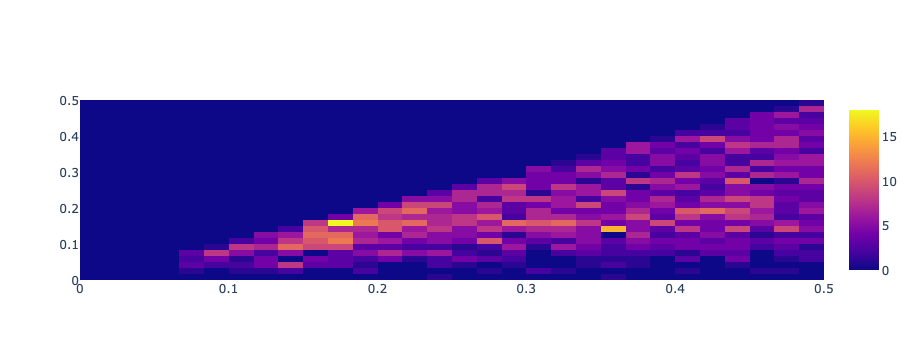

In [33]:
j = pn.plotly2D(pipi_hf)
fig2 = pi.from_json(j)
fig2.show()